#  Overview

The Terry Stops problem aims to predict the outcome of police stops based on reasonable suspicion using a classification model. The model considers various factors such as presence of weapons, time of day, and possibly gender and race of both the officer and the subject. However, the use of race and gender data raises ethical concerns and the importance of avoiding bias and discrimination must be taken into consideration. The goal of this model is to improve the efficiency and fairness of law enforcement actions, but the agencies must also monitor and address any potential biases.

# 1. Business Understanding


## 1.1. Problem
The Terry Stops presents a business opportunity to improve the efficiency and fairness of law enforcement actions. By developing a predictive model that can assist officers in determining the likelihood of an arrest being made during a Terry Stop, the law enforcement agencies can make informed decisions and potentially reduce the number of false arrests and incidents of police misconduct. However, it is important to approach this problem with caution and transparency, considering the ethical concerns raised by the use of gender and race data. The goal is to provide a tool that can help improve policing, while avoiding biases and discrimination.

## 1.2 Aim

The aim of this project is to build a classifier that can predict the outcome of a Terry Stop (whether an arrest was made or not) based on reasonable suspicion. This will be done by considering various factors such as the presence of weapons, time of day of the call, and other relevant information. The model will be designed to address the binary classification problem, with the goal of improving the efficiency and fairness of law enforcement actions.

## 1.3. 0bjectives
* To create a predictive model for Terry Stops that accurately predicts the outcome of the stop (arrest made or not)
* To take into consideration key factors such as the presence of weapons and the time of the call in the model
* To ensure that the model is ethically sound and avoids any biases or discrimination related to gender and race.

# 2. Data Understanding

## 2.1 Data Understanding
This dataset was provided by the City of Seattle and is managed by the Seattle Police Department. It was created on April 13, 2017 and last updated on February 6, 2023. The dataset contains **54873**, rows and **23** columns, each row representing a unique Terry Stop record as reported by the officer conducting the stop. The columns in the dataset include information about the subject of the stop, such as the perceived age group, perceived race, and perceived gender. 

The dataset also includes information about the officer, such as the officer's gender, race, and year of birth. Additionally, the dataset includes information about the resolution of the stop, any weapons found, the date and time the stop was reported, and information about the underlying Computer Aided Dispatch (CAD) event. The data is updated daily and is licensed under the public domain.

# 3. Requirements

* Data Preparation -> Loading Libraries -> Loading data -> Descriptive Exploration -> Data Cleaning -> Exploratory Descriptive Analysis (EDA) -> Pre-processing Data

* Modelling -> Train test split -> Logistic Regression -> K-Nearest -> Decision Tree -> Logistic Regression -> Random Forest
    
* Evaluation -> Classification Metrics -> Best Perfoming Model

* Conclusion -> Best Model
    
* Recommendation -> Most imporatnt features

# 4. Data Preparation

* Loading Libraries 
* Loading data 
* Descriptive Exploration
* Data Cleaning 
* Exploratory Descriptive Analysis (EDA) 
* Pre-processing Data
    * >Update the Stop Resolution column to either be arrested (1) or not arrested (0):
    * >Change the date column to datetime so we can work with it. Add in the month as a new column:
    * >Group weapons into firearms vs. non-firearms vs. no weapon:
    * >Change Officer year of bith to give the officer age:
    * >Drop columns that we are not going to need:
    * >Converting categorical data to numeric format through label encoder

### 4.1. Loading Libraries

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 4.2. Loading Data

In [2]:
# read the csv file to pandas data frame
Tery_df = pd.read_csv("data/Terry_Stops.csv")

# make copy
Tery_stops_df = Tery_df.copy(deep=True) 

# preview the first 3 rows
Tery_stops_df.head(3)

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,26 - 35,-1,20160000004638,207171,Field Contact,None,6970,1968,M,White,...,01:23:00.0000000,-,-,-,SOUTH PCT 3RD W - ROBERT,N,N,-,-,-
1,18 - 25,-1,20180000352673,484084,Offense Report,None,7794,1991,M,White,...,06:45:00.0000000,TRESPASS,TRESPASS,"TELEPHONE OTHER, NOT 911",NORTH PCT 1ST W - LINCOLN,N,N,North,L,L2
2,26 - 35,-1,20170000399165,325847,Offense Report,None,7795,1992,M,Hispanic or Latino,...,17:28:00.0000000,BURG - RES (INCL UNOCC STRUCTURES ON PROP),"--BURGLARY - RESIDENTIAL, UNOCCUPIED",911,EAST PCT 2ND W - CHARLIE RELIEF,N,N,East,C,C1


### 4.2.1 Dataet Columns
##### These are the  23 columns, with a concise explanation of the information contained in each column :



**Subject Age Group:** Subject Age Group (10 year increments) as reported by the officer.

**Subject ID:** Key, generated daily, identifying unique subjects in the dataset using a character to character match of first name and last name. "Null" values indicate an "anonymous" or "unidentified" subject. Subjects of a Terry Stop are not required to present identification.

**GO/SC Num:** General Offense or Street Check number, relating the Terry Stop to the parent report. This field may have a one to many relationship in the data.

**Terry Stop ID:** Key identifying unique Terry Stop reports.

**Stop Resolution:** Resolution of the stop as reported by the officer.

**Weapon Type:** Type of weapon, if any, identified during a search or frisk of the subject. Indicates "None" if no weapons was found.

**Officer ID:** Key identifying unique officers in the dataset.

**Officer YOB:** Year of birth, as reported by the officer.

**Officer Gender:** Gender of the officer, as reported by the officer.

**Officer Race:** Race of the officer, as reported by the officer.

**Subject Perceived Race:** Perceived race of the subject, as reported by the officer.

**Subject Perceived Gender:** Perceived gender of the subject, as reported by the officer.

**Reported Date:** Date the report was filed in the Records Management System (RMS). Not necessarily the date the stop occurred but generally within 1 day.

**Reported Time:** Time the stop was reported in the Records Management System (RMS). Not the time the stop occurred but generally within 10 hours.

**Initial Call Type:** Initial classification of the call as assigned by 911.

**Final Call Type:** Final classification of the call as assigned by the primary officer closing the event.

**Call Type:** How the call was received by the communication center.

**Officer Squad:** Functional squad assignment (not budget) of the officer as reported by the Data Analytics Platform (DAP).

**Arrest Flag:** Indicator of whether a "physical arrest" was made, of the subject, during the Terry Stop. Does not necessarily reflect a report of an arrest in the Records Management System (RMS).

**Frisk Flag:** Indicator of whether a "frisk" was conducted, by the officer, of the subject, during the Terry Stop.

**Precinct:** Precinct of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.

**Sector:** Sector of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.

**Beat:** Beat of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.




### 4.3.  Descriptive Exploration
Describing the data set in terms of shape and the data types for all the columns present. Most of the columns are categorical and have the 'object' datatype.

In [3]:
# a function to summarise the data set
# check number of categorical and numerical columns
def columns_dtypes(df):
    print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns")
    print()
    num = len(df.select_dtypes(include=np.number).columns)
    cat = len(df.select_dtypes(include='object').columns)
    print(f"Numerical columns: {num}")
    print(f"Categorical columns: {cat}")
    print()
    print("These are the datatypes of column :")
    return df.dtypes

In [4]:
# call the function  
columns_dtypes(Tery_stops_df)

This dataset has 54873 rows and 23 columns

Numerical columns: 4
Categorical columns: 19

These are the datatypes of column :


Subject Age Group           object
Subject ID                   int64
GO / SC Num                  int64
Terry Stop ID                int64
Stop Resolution             object
Weapon Type                 object
Officer ID                  object
Officer YOB                  int64
Officer Gender              object
Officer Race                object
Subject Perceived Race      object
Subject Perceived Gender    object
Reported Date               object
Reported Time               object
Initial Call Type           object
Final Call Type             object
Call Type                   object
Officer Squad               object
Arrest Flag                 object
Frisk Flag                  object
Precinct                    object
Sector                      object
Beat                        object
dtype: object

### Fuction to describe the categorical data through count plots

In [5]:
def plot_value_counts(df, col_name):
    # Count the number of unique values for the column "Stop Resolution"
    value_counts = df[col_name].value_counts()

    # plot the bar chart
    plt.figure(figsize=(12,8))
    plt.bar(value_counts.index, value_counts.values)
    
    
    # label the x and y axis
    plt.title("Bar plot for the count of " + col_name, fontsize=20)
    plt.xlabel(col_name, fontsize=16)
    plt.ylabel("Count", fontsize=16)

    # add grid
    plt.grid(True, linestyle='--')
    
    # show the plot
    plt.show()

####  Target Column Distribution


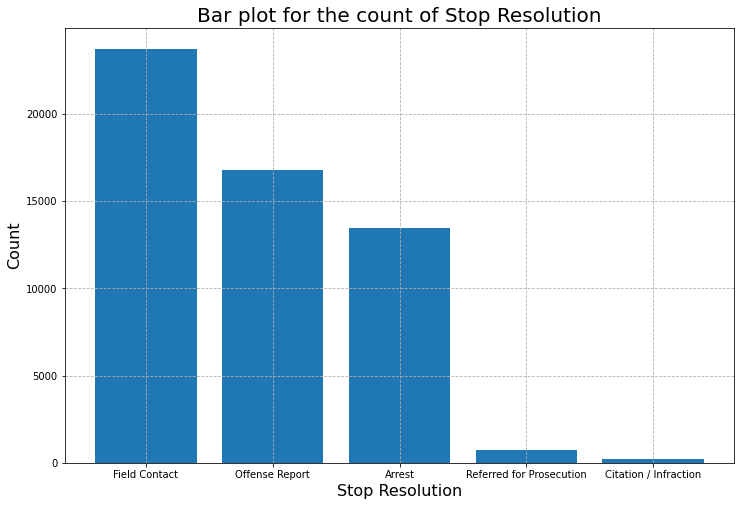

In [6]:
# call the function    
plot_value_counts(Tery_stops_df,"Stop Resolution")

>From the count plot, most of the stops did not result into arrests. Field contact dominated the stop resolution as seen from the plot.

### 4.4 Data Cleaning

Identifying and correcting inaccuracies, inconsistencies, and irrelevant data from a dataset. These were the steps
* handling missing values
* removing duplicates
* correcting data format
* transforming variables to make the data ready for modelling and predictions.

#### 4.4.1. Missing and Duplicate Values
A function to check duplicates and null

In [7]:
def check_duplicates_missing(dataframe):
    # calculate percentage of missing values
    percent_missing = dataframe.isnull().mean().round(4) * 100
    count_missing = dataframe.isnull().sum()
    # calculate percentage of duplicate rows
    percent_duplicates = dataframe.duplicated().mean() * 100
    # create result dataframe
    result = pd.DataFrame({'Missing Values %': percent_missing, 
                           'Missing Values Count': count_missing, 
                           'Duplicate Values %': percent_duplicates})
    # find column with most missing values
    if percent_missing.max() !=0:
        column_most_missing = percent_missing.idxmax()
        print(f"{(column_most_missing).capitalize()} is the column with most null count.")
        print()
    else:
        print("No column with missing values")
    if percent_duplicates.max() !=0:
        column_most_duplicates = percent_duplicates.idxmax()
        print("Column with most duplicates:",column_most_duplicates)
    else:
        print("No duplicates")
    return result

In [8]:
# call function on the dataset
check_duplicates_missing(Tery_stops_df)

Officer squad is the column with most null count.

No duplicates


,Missing Values %,Missing Values Count,Duplicate Values %
Subject Age Group,0.00,0,0.0
Subject ID,0.00,0,0.0
GO / SC Num,0.00,0,0.0
Terry Stop ID,0.00,0,0.0
Stop Resolution,0.00,0,0.0
Weapon Type,0.00,0,0.0
Officer ID,0.00,0,0.0
Officer YOB,0.00,0,0.0
Officer Gender,0.00,0,0.0
Officer Race,0.00,0,0.0


####  Investigate the null values
I check the null values before deciding on how best to deal with them.

##### compare officer ID vs the missing information

In [9]:
#get the null dataframe
null_data = Tery_stops_df[Tery_stops_df.isnull().any(axis=1)]

# group the data by Officer ID
grouped = null_data.groupby('Officer ID')

# count the number of missing values in each group
missing_counts = grouped.apply(lambda x: x.isnull().sum())

# get the columns with missing values
missing_columns = missing_counts.columns[missing_counts.sum() > 0]

# create a new dataframe with the missing counts for each Officer ID
missing_df = missing_counts[missing_columns].reset_index()

# rename the columns for clarity
missing_df.columns = ['Officer ID', 'Missing Count']

# compare the number of missing values for each Officer ID
missing_df.sort_values(by='Missing Count', ascending=False).head(7)


,Officer ID,Missing Count
713,8646,314
238,7456,197
714,8647,188
754,8689,184
758,8696,182
745,8680,173
749,8684,142


>I will drop the Officer Squad column because the null values equals to **37.78%**  and the information it contains I will not use for my analysis.

In [10]:
# drop the Officer Squad column
No_null_df = Tery_stops_df.drop(["Officer Squad"], axis=1)

# check to confirm id data still has missing values 
check_duplicates_missing(No_null_df)

No column with missing values
No duplicates


,Missing Values %,Missing Values Count,Duplicate Values %
Subject Age Group,0.0,0,0.0
Subject ID,0.0,0,0.0
GO / SC Num,0.0,0,0.0
Terry Stop ID,0.0,0,0.0
Stop Resolution,0.0,0,0.0
Weapon Type,0.0,0,0.0
Officer ID,0.0,0,0.0
Officer YOB,0.0,0,0.0
Officer Gender,0.0,0,0.0
Officer Race,0.0,0,0.0


>Data all good the null values handled and no duplicate.

#### 4.4.2. Correcting Data Format
This are the steps taken in correcting data format:
* Update the Stop Resolution column to either be arrested (1) or not arrested (0)
* Change the date column to datetime
* Group weapons into firearms vs. non-firearms vs. no weapon:
* Change Officer year of bith to give the officer age
* To categorize this time as either "daytime" or "nighttime"
* Drop columns that we are not going to need
* Converting categorical data to numeric format through label encoder

##### * Fix structural error

In [11]:
# replace with new stings
No_null_df = No_null_df.replace(["-"], "No Information")
No_null_df.head(3)

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Date,Reported Time,Initial Call Type,Final Call Type,Call Type,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,26 - 35,-1,20160000004638,207171,Field Contact,None,6970,1968,M,White,...,2016-10-31T00:00:00Z,01:23:00.0000000,No Information,No Information,No Information,N,N,No Information,No Information,No Information
1,18 - 25,-1,20180000352673,484084,Offense Report,None,7794,1991,M,White,...,2018-09-22T00:00:00Z,06:45:00.0000000,TRESPASS,TRESPASS,"TELEPHONE OTHER, NOT 911",N,N,North,L,L2
2,26 - 35,-1,20170000399165,325847,Offense Report,None,7795,1992,M,Hispanic or Latino,...,2017-10-27T00:00:00Z,17:28:00.0000000,BURG - RES (INCL UNOCC STRUCTURES ON PROP),"--BURGLARY - RESIDENTIAL, UNOCCUPIED",911,N,N,East,C,C1


##### * Update the Stop Resolution column to binary

In [12]:
# get unique values in stop resolution
stop_resolution_unique = set(No_null_df["Stop Resolution"])
print(f"before:\n{stop_resolution_unique}")

# update to binary the colum values
values = ['Arrest', 'Citation / Infraction', 'Field Contact', 'Offense Report', 'Referred for Prosecution']
conversion_dict = {val: 1 if val == 'Arrest' else 0 for val in values}

# update column in data frame
No_null_df["Stop Resolution"] = No_null_df["Stop Resolution"].map(conversion_dict)
print()
# check data type after update
new_stop_resolution_unique = set(No_null_df["Stop Resolution"])
print(f"after:\n{new_stop_resolution_unique}")

before:
{'Referred for Prosecution', 'Field Contact', 'Offense Report', 'Citation / Infraction', 'Arrest'}

after:
{0, 1}


##### * Change the Reported Date column from object to datetime .

The data description, Reported Date, is the date the report was filed in the Records Management System (RMS). Not necessarily the date of the stop, but generally within one day.
Convert to date time so that I checked how different days and years affected the targert column

In [13]:
# convert to datetime type
No_null_df['Reported Date'] = pd.to_datetime(No_null_df['Reported Date'])

# extract day
No_null_df['Day'] = No_null_df['Reported Date'].dt.day
# extract year
No_null_df['Year'] = No_null_df['Reported Date'].dt.year

#
No_null_df['Month'] = No_null_df['Reported Date'].dt.month.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July'
                                               ,8:'August',9:'September',10:'October',11:'November',12:'December'})


>There are columns for the day, month and year for each of the Terry-stops in te datammset

##### * Group weapons

##### What is a firearm?

The general classification of firearms can be based on the following criteria: Level of harm they produce. Lethal - designed with the intent to eventually kill the target. Non-lethal - designed with the intent to scare or incapacitate the target, without killing or producing major, irreversible injuries.

This column shwed a list of the type weapons if any, identified during a search or frisk of the subject. Indicates "None" if no weapons was found.

In [14]:
# gets weapons category
weapons = list(dict(No_null_df['Weapon Type'].value_counts()).keys())
print("These are the weapon classes :")
weapons

These are the weapon classes :


['None',
 'No Information',
 'Lethal Cutting Instrument',
 'Knife/Cutting/Stabbing Instrument',
 'Handgun',
 'Blunt Object/Striking Implement',
 'Firearm Other',
 'Firearm',
 'Club, Blackjack, Brass Knuckles',
 'Other Firearm',
 'Mace/Pepper Spray',
 'Firearm (unk type)',
 'Taser/Stun Gun',
 'None/Not Applicable',
 'Fire/Incendiary Device',
 'Club',
 'Rifle',
 'Shotgun',
 'Automatic Handgun',
 'Personal Weapons (hands, feet, etc.)',
 'Brass Knuckles',
 'Blackjack']

I will convert the firearm category to binary, it will be Firearm is designed with the intent to eventually kill the target and Non Firearm if designed with the intent to scare or incapacitate the target, without killing or producing major, irreversible injuries. 

In [15]:
# map the new values to the weapon found column
No_null_df['Weapon Type'] = No_null_df['Weapon Type'].map(
{
 'None': 'Non Firearm',
 '-': 'Non Firearm',
 'Lethal Cutting Instrument': 'Non Firearm',
 'Knife/Cutting/Stabbing Instrument': 'Non Firearm',
 'Handgun': 'Firearm',
 'Blunt Object/Striking Implement': 'Non Firearm',
 'Firearm Other': 'Firearm',
 'Firearm': 'Firearm',
 'Club, Blackjack, Brass Knuckles': 'Non Firearm',
 'Other Firearm': 'Firearm',
 'Mace/Pepper Spray': 'Non Firearm',
 'Firearm (unk type)': 'Firearm',
 'Taser/Stun Gun': 'Non Firearm',
 'None/Not Applicable': 'Non Firearm',
 'Fire/Incendiary Device': 'Non Firearm',
 'Club': 'Non Firearm',
 'Rifle': 'Firearm',
 'Shotgun': 'Firearm',
 'Automatic Handgun': 'Firearm',
 'Personal Weapons (hands, feet, etc.)': 'Non Firearm',
 'Brass Knuckles': 'Non Firearm',
 'Blackjack': 'Non Firearm'
 })

Most of the weapons were classified as Non Firearm

##### * Get  officer age using YOB

In [16]:
# get age by subtracting from current year 
No_null_df['Officer Age'] = 2023 - No_null_df["Officer YOB"]

# preview the new column
No_null_df[["Stop Resolution", "Officer Age"]].tail(7)

,Stop Resolution,Officer Age
54866,0,44
54867,0,60
54868,0,36
54869,0,37
54870,1,40
54871,0,59
54872,0,54


##### * Convert time to binary

In [17]:
# function to split time column and extract hour and group as night or dat
def categorize_time(column):
    def categorize_time_helper(time):
        hour = int(time.split(":")[0])
        if hour >= 6 and hour < 18:
            return "Day"
        else:
            return "Night"

    return column.apply(categorize_time_helper)

No_null_df["Time Category"] = categorize_time(No_null_df["Reported Time"])    

In [18]:
# ages considered as categorical, convert oficcer age  column to object
No_null_df["Officer Age"] = No_null_df["Officer Age"].astype("object")

##### Drop irrelevant columns

In [19]:
# columns to be dropped
irrelevant_columns = [
    'Subject ID',
    'GO / SC Num',
    'Terry Stop ID',
    'Officer YOB',
    'Reported Date',
    'Officer ID',
    'Officer Gender',
    'Officer Race',
    'Subject Perceived Race',
    'Subject Perceived Gender',
    'Reported Time',
    'Final Call Type',
    'Call Type',
    'Initial Call Type',
    'Officer YOB',
    'Day'   
]

# drop the columns
df = No_null_df.drop(irrelevant_columns, axis=1)

### Final data set to be used in modelling

In [20]:
df
list(df.columns)

['Subject Age Group',
 'Stop Resolution',
 'Weapon Type',
 'Arrest Flag',
 'Frisk Flag',
 'Precinct',
 'Sector',
 'Beat',
 'Year',
 'Month',
 'Officer Age',
 'Time Category']

## 4.5. Exploratory Data Analysis

The dataset has an additional columns, during data processing I feature engineered columns to help in better understanding of any underlying patterns that would help make better predictions.

There are some columns that I will not use in my analysis and I drop the at this point, part of  final preparation before modelling.I'd like to point out that I'll be removing the subject's race and gender because these are only perceived by the officer and thus their accuracy cannot be trusted.

#### Data Prepocessing

In [21]:
# function to find categorical columns convert and return a df
def process_df(df):
    # Find categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    # One hot encode categorical columns and drop the first one to avoid multi-collinearity
    categorical_ohe = pd.get_dummies(df[categorical_cols], drop_first=True)
    
    # Select numerical columns
    numerical_cols = df.select_dtypes(exclude=['object']).columns
    
    # Combine one-hot encoded categorical columns with numerical columns
    final_df = pd.concat([df[numerical_cols], categorical_ohe], axis=1)
    
    return final_df

# call the function and preview 
final_df = process_df(df)
final_df.head(7)

,Stop Resolution,Year,Subject Age Group_18 - 25,Subject Age Group_26 - 35,Subject Age Group_36 - 45,Subject Age Group_46 - 55,Subject Age Group_56 and Above,Subject Age Group_No Information,Weapon Type_Non Firearm,Arrest Flag_Y,...,Officer Age_68,Officer Age_69,Officer Age_70,Officer Age_71,Officer Age_72,Officer Age_74,Officer Age_75,Officer Age_77,Officer Age_123,Time Category_Night
0,0,2016,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,2018,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2017,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2020,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,2017,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,2017,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,2019,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Defining `X` and `y`

To start out, I'll consider `y` to be the **Stop Resolution** variable (`Arrested`) and everything else to be `X`, the **independent features**

In [47]:
# predictors
X  = final_df.drop(["Stop Resolution"], axis=1)

# target
target = final_df[["Stop Resolution"]]
y = np.ravel(target)

#### Train - Test Split

Test and train split was on test at 20% of the data. More data given to training data set to ensure the model get all the patterns and perfom better

In [48]:
# import relevant library
from sklearn.model_selection import train_test_split

# perform the tarin split
X_train, X_test, y_train, y_test = train_test_split(final_df, y, test_size = 0.33, random_state=2)

# display shape of splits
print(f"X_train : {X_train.shape}")
print(f"X_test : {X_test.shape}")
print()
print(f"y_train : {y_train.shape}")
print(f"y_test : {y_test.shape}")

X_train : (36764, 157)
X_test : (18109, 157)

y_train : (36764,)
y_test : (18109,)


### Final data for Modlelling

This was the final data frame to be used for modelling.

# 5.0. Modelling

Modelling is the process of creating a mathematical representation of a real-world phenomenon. Modelling involves training a model on a dataset and using it to make predictions on new data. 
These are the algorithims are I will used in my modelling:
* Logistic Regression - Baseline moel
* K Neighbors Classifier
* Random Forest Classifier
* 

##### Function to evaluate the models
The function takes a model as input and fits it to the training data after transforming it using a MinMaxScaler. Then, the model is used to make predictions on both the training and test datasets, and the performance is evaluated using accuracy, precision, recall, and F1-score. The results are stored in a Pandas dataframe and returned.


In [49]:
def eval_model(model):
    # scale the data
    min_max_scaler = MinMaxScaler()
    X_train_fit_transformed = min_max_scaler.fit_transform(X_train)
        
    # transform the test data
    X_test_transformed = min_max_scaler.transform(X_test)

    # fit model to training data
    model.fit(X_train_fit_transformed, y_train)      
    
    y_train_pred = model.predict(X_train_fit_transformed)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)

    # predictions on test data
    y_test_pred = model.predict(X_test_transformed)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)

    results = {
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
        'Train': [accuracy_train, precision_train, recall_train, f1_train],
        'Test': [accuracy_test, precision_test, recall_test, f1_test]
    }

    df = pd.DataFrame(results)
    return df


###  5.1. Baseline Model
    Logistic REgression Model

In [50]:
# import relevant libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# model the class
baseline = LogisticRegression()

# scale the data
min_max_scaler = MinMaxScaler()
X_train_fit_transformed = min_max_scaler.fit_transform(X_train)

# fit model with training data
baseline.fit(X_train_fit_transformed, np.ravel(y_train))

# make train predictions
y_train_pred = baseline.predict(X_train_fit_transformed)

# make test predictions
X_test_scaled = min_max_scaler.transform(X_test)
y_test_pred = baseline.predict(X_test_scaled)

#evaluate model
eval_model(baseline)

,Metric,Train,Test
0,Accuracy,1.0,1.0
1,Precision,1.0,1.0
2,Recall,1.0,1.0
3,F1 Score,1.0,1.0


### 5.2. Second Model 
    k-Nearest Neighbors (k-NN)

In [51]:
# import relevant libraries
from sklearn.neighbors import KNeighborsClassifier

# model
knn_model2 = KNeighborsClassifier()

# scale the data
min_max_scaler = MinMaxScaler()
X_train_fit_transformed = min_max_scaler.fit_transform(X_train)

# fit model with training data
knn_model2.fit(X_train_fit_transformed, y_train)

# make predictions on test and training
knn_model2.predict(X_train_fit_transformed)

# evaluate model using function
eval_model(knn_model2)

,Metric,Train,Test
0,Accuracy,0.978675,0.961069
1,Precision,0.992013,0.986137
2,Recall,0.920677,0.852555
3,F1 Score,0.955015,0.914494


### 5.3. Third Model
    Random forest Model

In [52]:
# import relevant libraries
from sklearn.ensemble import RandomForestClassifier

# class model
rfc_model4 = RandomForestClassifier()

# scale the data
min_max_scaler = MinMaxScaler()
X_train_fit_transformed = min_max_scaler.fit_transform(X_train)


# fit the model with training set
rfc_model4.fit(X_train_fit_transformed, y_train)

# evaluate model using function
eval_model(rfc_model4)

,Metric,Train,Test
0,Accuracy,1.0,1.0
1,Precision,1.0,1.0
2,Recall,1.0,1.0
3,F1 Score,1.0,1.0


## 6. Model Evaluation

In [54]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
model = DecisionTreeClassifier()

# fit the model to the training data
model.fit(X_train, y_train)

# predict the target on the test data
y_test_pred = model.predict(X_test)

# calculate the accuracy score
accuracy = accuracy_score(y_test, y_test_pred)
accuracy

1.0

I evaluate how well the prediction model is working. For this evaluation, the most important metrics are recall and precision.

**Recall** measures how many arrests the model correctly identified, out of all the actual arrests that happened. A high recall value means that the model is good at finding all the arrests, and not missing any. This is exactly how I inted my model to help n solving the real problem by cirrectly indicating an arrest.

**Precision** measures how many of the predictions made by the model were actually correct. A high precision value means that the model is good at not making any false predictions, such as predicting that an arrest was made when it actually wasn't.

**F1** score, which balances recall and precision and provides a single score to evaluate the model. The F1 score gives a good overall picture of how well the model is doing in finding all the arrests and not making false predictions.

By using these metrics, I can compare different models and choose the best one for making predictions about arrests during Terry stops.

In [35]:
# empty list for the all the models used
model_pipeline = []
#model_pipeline.append(baseline)
model_pipeline.append(knn_model2)
model_pipeline.append(dtc_model3)
model_pipeline.append(rfc_model4)
model_pipeline.append(xgb_model5)

model_pipeline

[KNeighborsClassifier(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
               missing=nan, monotone_constraints='()', n_estimators=100,
               n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
               reg_alpha=0, reg_lambda=1, ...)]

## Grid Search

I will use to optimize the hyperparameters of a the models. I perform systematic trying out different combinations of hyperparameters for each classifier and selecting the combination that leads to the best performance on the test data.

* Logistic Regression classifier :  fit_intercept hyperparameter, solvers. 
* KNeighborsClassifier : n_neighbors hyperparameter. 
* DecisionTreeClassifier : max_depth hyperparameter
* RandomForestClassifier : max_depth hyperparameter. 


In [46]:
# Import relevant libraries
from sklearn.model_selection import GridSearchCV

# Hyperparameters to search for each of the classification models
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13]
}


param_grid_rf = {
    'n_estimators': [10, 50, 100, 500],
    'max_depth': [3, 5, 7, 9, 11, None]
}

param_grid_xgb = {
    'max_depth': [3, 5, 7, 9, 11],
    'n_estimators': [10, 50, 100, 500]
}

# My models 
knn_model2 = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rfc_model4 = RandomForestClassifier()
xgb = XGBClassifier()

# List of classifiers and their corresponding hyperparameters
classifiers = [
    (knn, param_grid_knn),
    (dt, param_grid_dt),
    (rf, param_grid_rf),
    (xgb, param_grid_xgb)
]

# Loop over the classifiers and perform a grid search for each one
for classifier, param_grid in classifiers:
    clf = GridSearchCV(classifier, param_grid, cv=5, scoring='recall')
    clf.fit(X_train, y_train.ravel())
    print(f"Best parameters for {clf.__class__.__name__}: {clf.best_params_}")
    print(f"Best recall for {clf.__class__.__name__}: {clf.best_score_:.3f}")


NameError: name 'XGBClassifier' is not defined

### Feature importance

##### Baseline Model

In [ ]:
# Get the coefficients
coefficients = baseline.coef_[0]

# Create a data frame to store the results
results = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort the results by coefficient magnitude in descending order
results = results.sort_values(by='Coefficient', ascending=False)

# Print the top 7 features
results.head(8)

##### RandomForestClassifier

In [ ]:
# Get the feature importances
importances = rfc_model4.feature_importances_

# Create a data frame to store the results
results = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the results by importance in descending order
results = results.sort_values(by='Importance', ascending=False)

# Print the top 7 features
results.head(8)